In [1]:
from pathlib import Path
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set_theme()
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import numpy as np
from scipy.optimize import curve_fit

In [4]:
volume_df = pd.read_csv(Path(Path.home(), "Documents/xray/sample_bench/data/7mhf/182_bench/volume.csv"), index_col=0)
volume_df.head()

,n,r_free_mean,r_free_std,ff_mean,ff_std,rmsd_mean,rmsd_std,n_out,j
0,0,0.356487,0.005714,1710.580224,250.682058,0.387505,0.010552,1.0,0
1,0,0.353415,0.004430,1735.572157,239.725852,0.385597,0.009889,2.0,0
2,0,0.351923,0.003875,1755.534978,225.530715,0.384386,0.009345,3.0,0
3,0,0.350999,0.003682,1767.711169,215.255705,0.384009,0.008947,4.0,0
4,0,0.350249,0.003511,1776.379537,207.212303,0.383422,0.008809,5.0,0


In [17]:
natives_df = pd.read_csv(Path(Path.home(), "Documents/xray/dev/29_synthetic_native_3/data/scores/7mhf_30.csv"), index_col=0)
natives_df["xray_0+xray_1"] = (natives_df["xray_0"] + natives_df["xray_1"])/2
natives_df["rmsd_0+rmsd_1"] = (natives_df["rmsd_0"] + natives_df["rmsd_1"])/2
natives_df["r_free_0+r_free_1"] = (natives_df["r_free_0"] + natives_df["r_free_1"])/2

natives_df.head()

,pdb,w_0_0,w_1_0,w_0_1,w_1_1,xray_0,r_free_0,rmsd_0,ff,xray_1,r_free_1,rmsd_1,xray_0+xray_1,rmsd_0+rmsd_1,r_free_0+r_free_1
0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.510588,0.489412,0.555566,0.444434,4.025633,0.039276,0.0,21250.054492,4.053322,0.043427,0.0,4.039478,0.0,0.041352
1,/wynton/group/sali/mhancock/xray/sample_bench/...,0.893325,0.106675,0.739213,0.260787,4.227168,0.040899,0.0,20682.124765,4.121057,0.041334,0.0,4.174113,0.0,0.041117
2,/wynton/group/sali/mhancock/xray/sample_bench/...,0.585996,0.414004,0.582210,0.417790,4.054030,0.040999,0.0,20822.373139,4.048832,0.040720,0.0,4.051431,0.0,0.040860
3,/wynton/group/sali/mhancock/xray/sample_bench/...,0.375460,0.624540,0.297137,0.702863,4.064986,0.041624,0.0,21136.167610,4.103359,0.040295,0.0,4.084173,0.0,0.040960
4,/wynton/group/sali/mhancock/xray/sample_bench/...,0.303720,0.696280,0.357188,0.642812,4.093771,0.041402,0.0,20683.275695,4.082613,0.040715,0.0,4.088192,0.0,0.041058


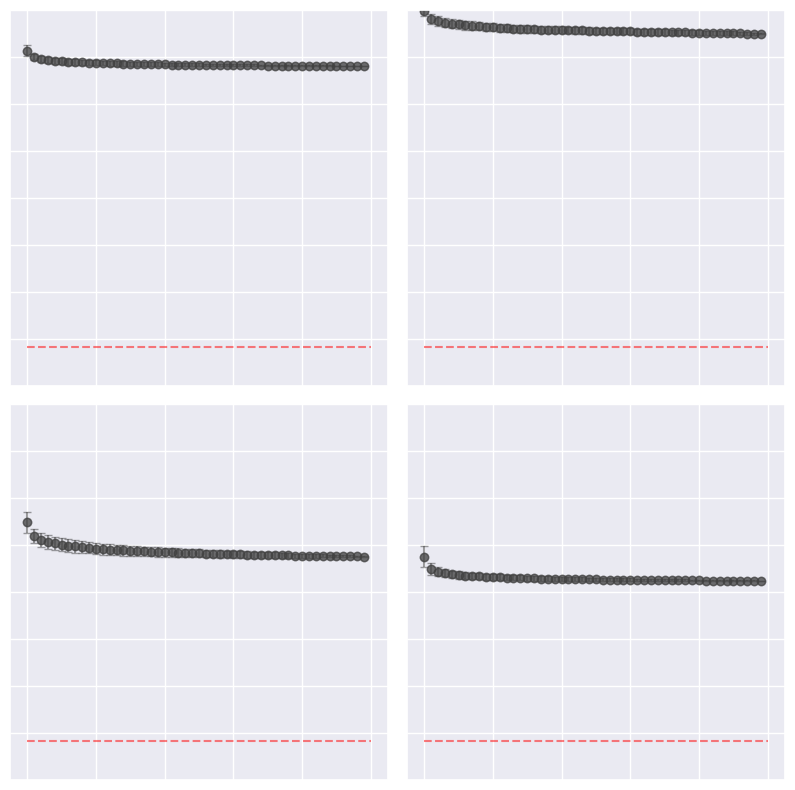

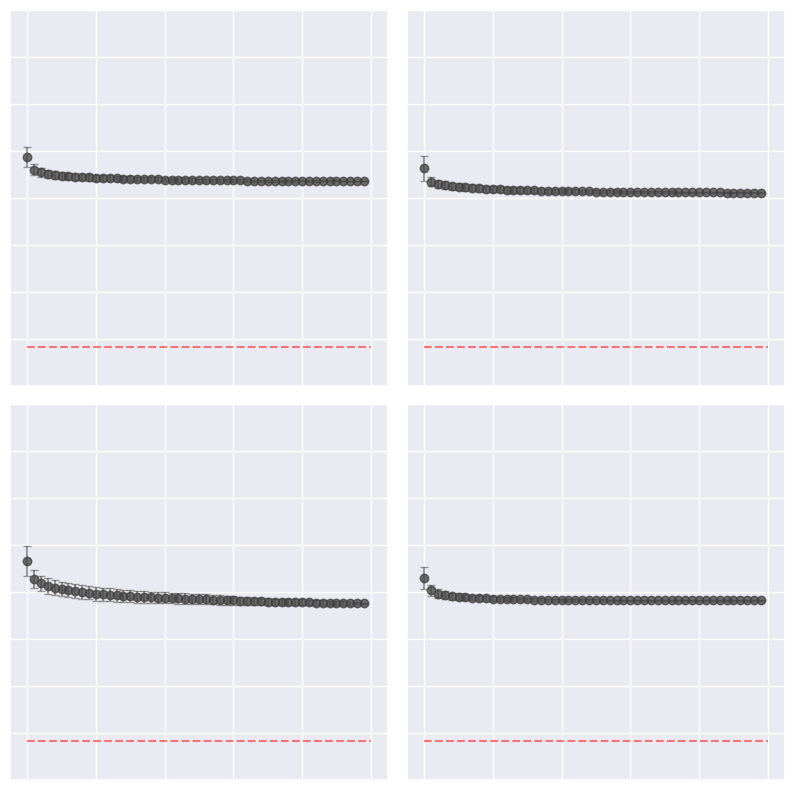

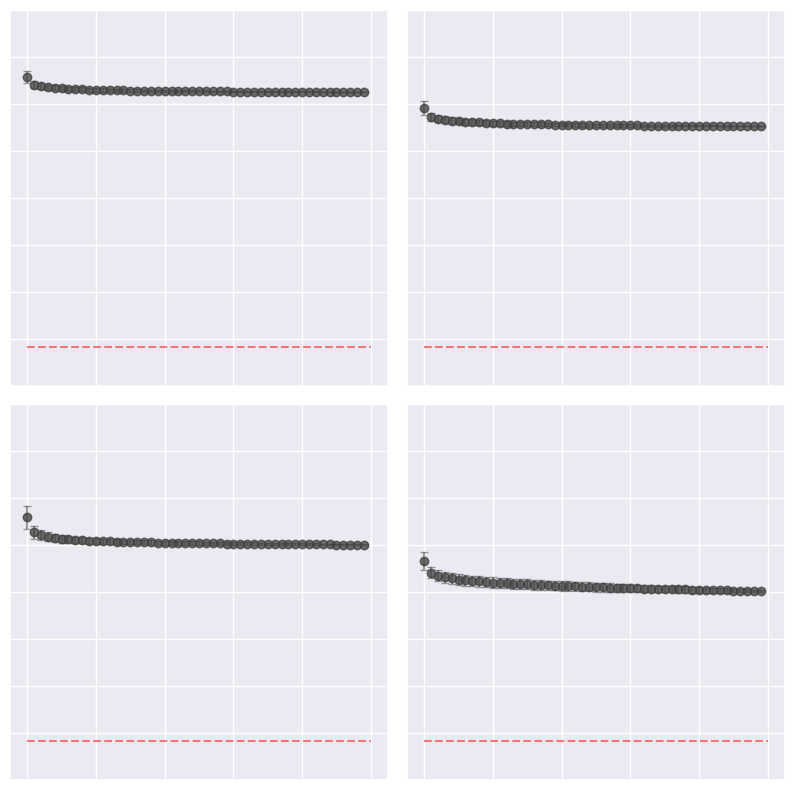

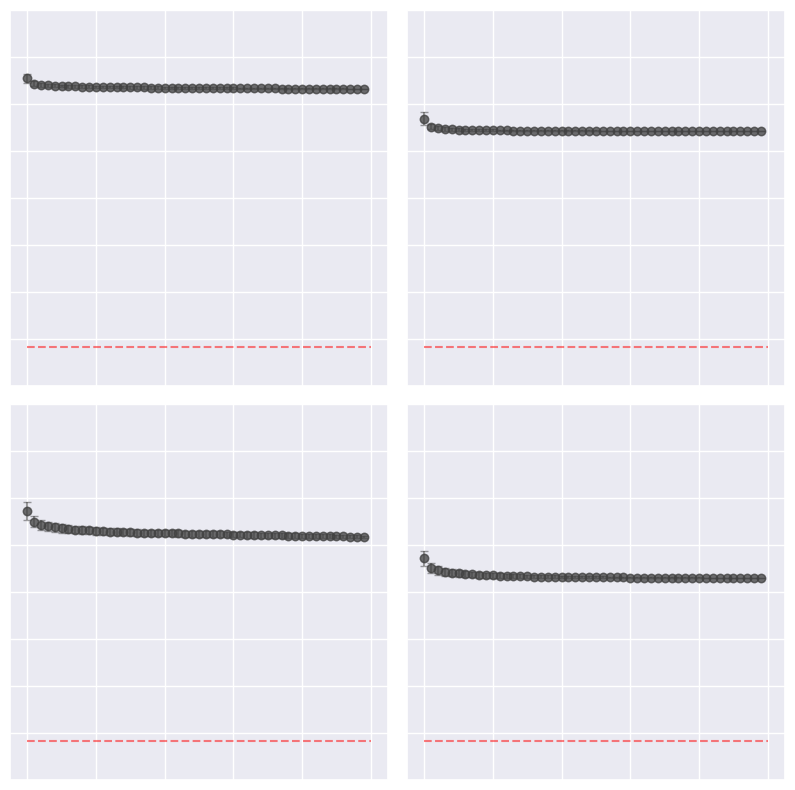

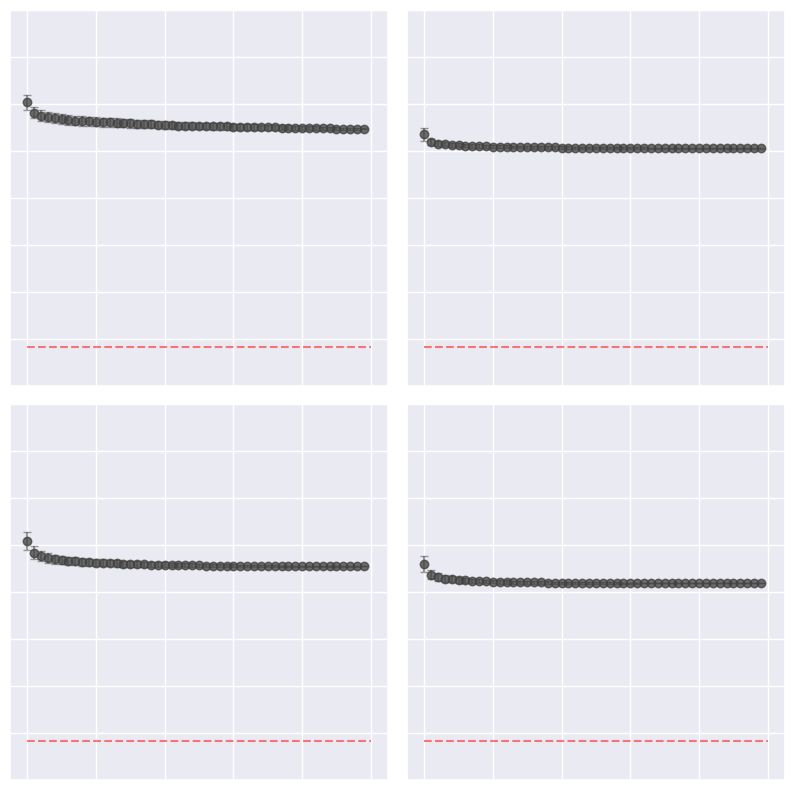

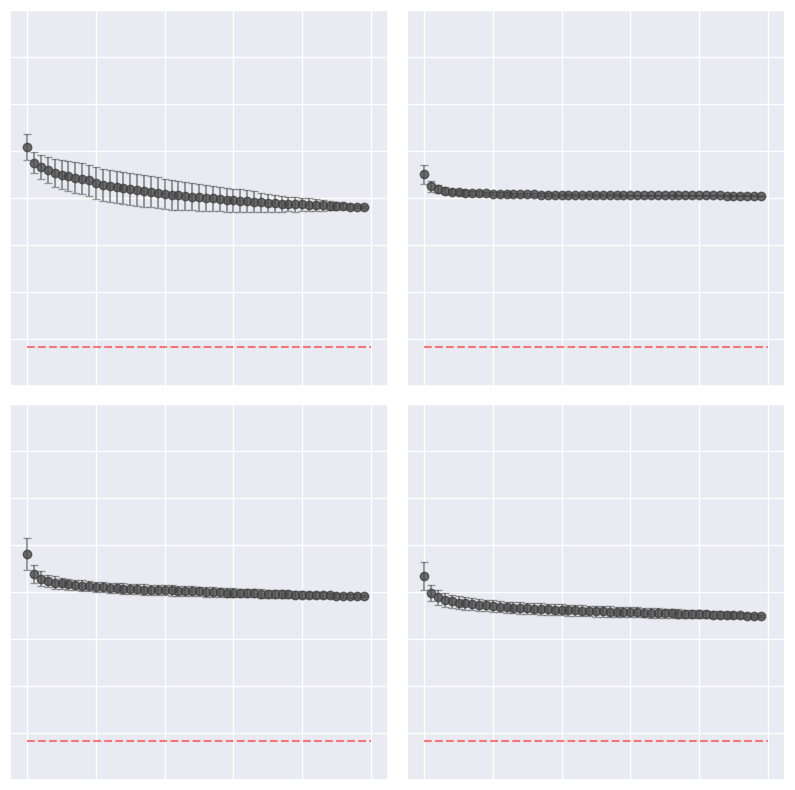

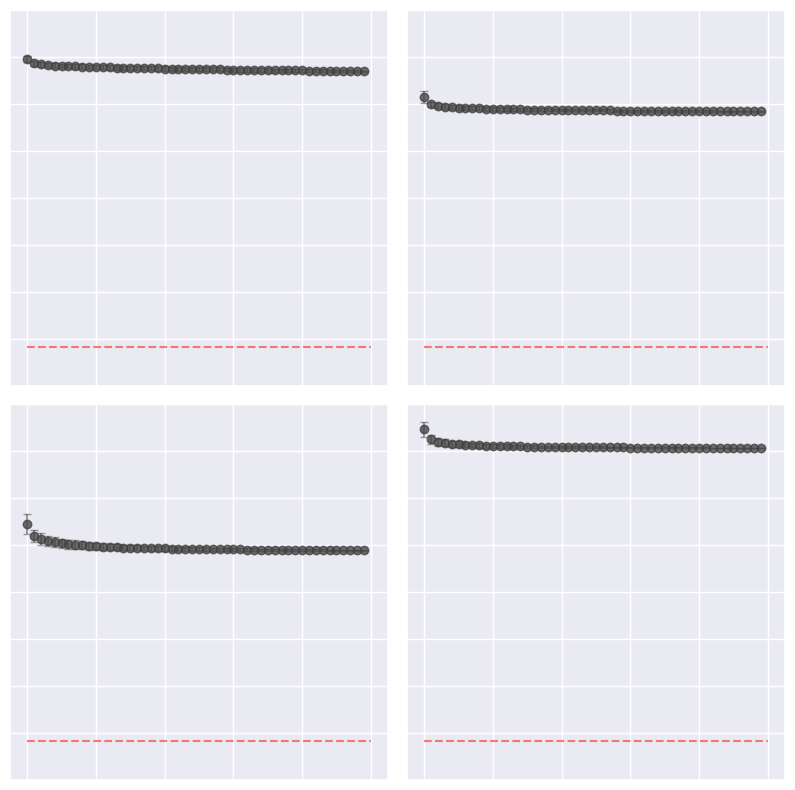

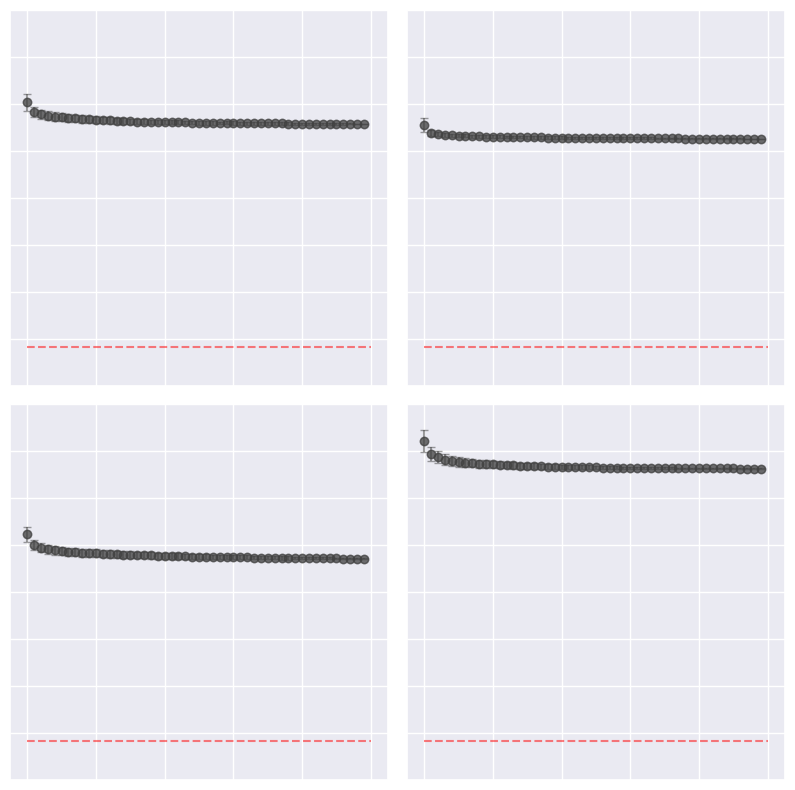

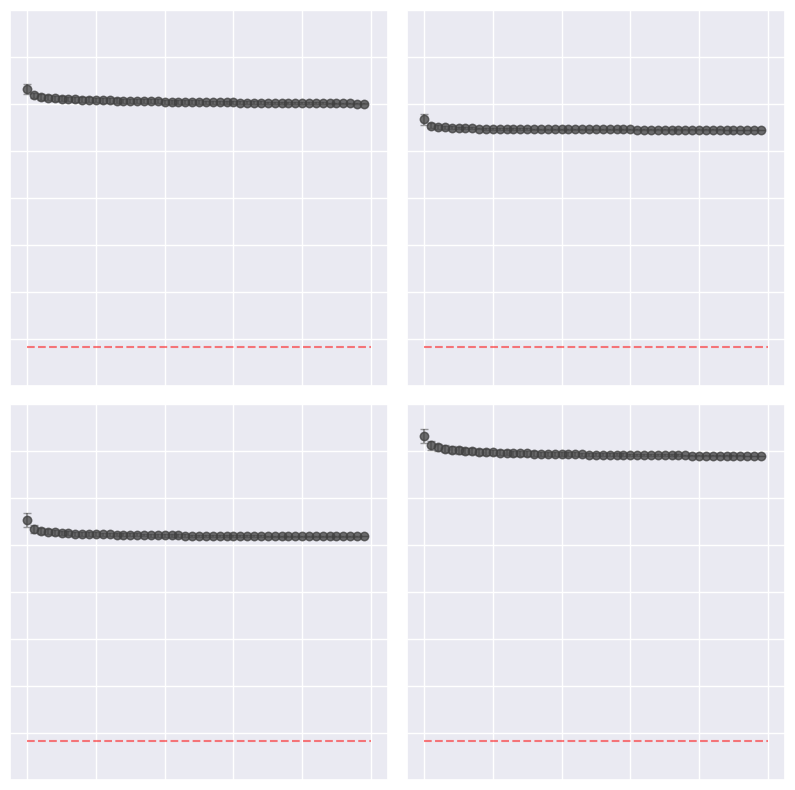

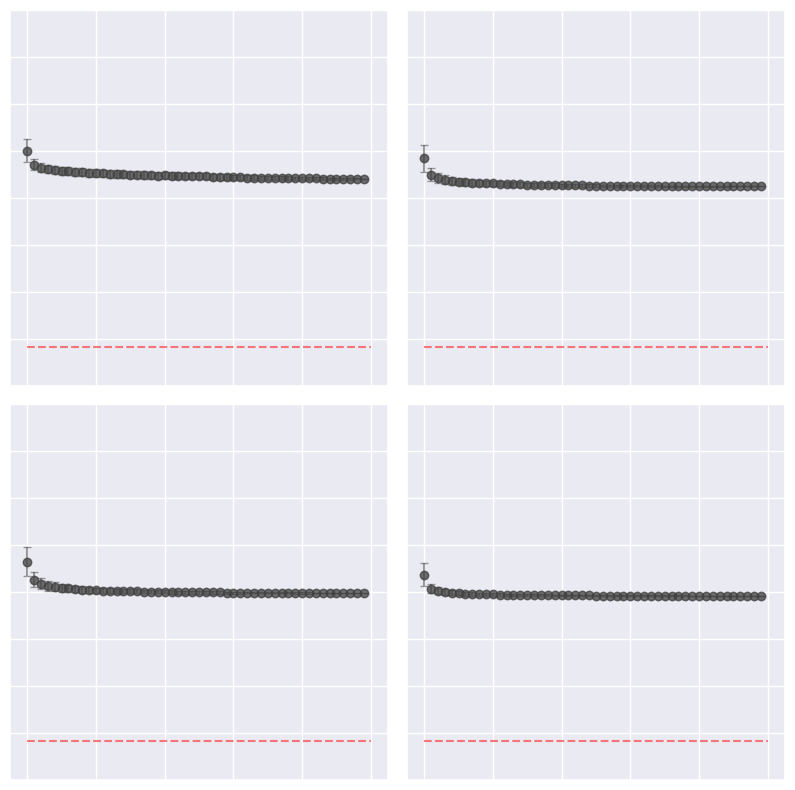

In [33]:
alpha = .5
space = 5

file_names = ["xray", "xray_rmsd", "rmsd"]


for nat_id in range(10):
    js = [nat_id*2, nat_id*2+1]

    fig, axs = plt.subplots(2, 2, figsize=(10,10))
    for n in range(2):
        for i in range(2):
            subset_df = volume_df[(volume_df["n"] == n) & (volume_df["j"] == js[i])]

            x = list(range(250))
            y = subset_df["{}_mean".format("r_free")]
            std = subset_df["{}_std".format("r_free")]

            ax = axs[n,i]
            ax.scatter(x[::space], y[::space], c="#424242ff", alpha=alpha)
            ax.errorbar(x[::space], y[::space], std[::space], linestyle='None', marker='o', capsize=3, c="#424242ff", alpha=alpha)

            if j == 0:
                native_score = natives_df.loc[0]["r_free_0"]
            else:
                native_score = natives_df.loc[0]["r_free_0+r_free_1"]

            ax.plot([0, 250], [native_score, native_score], c="red", linestyle="--", alpha=alpha)

            ax.set_ylim(0, .4)

            ax.tick_params(bottom=False, labelbottom=False)
            ax.tick_params(left=False, labelleft=False)
            plt.xlabel(None)
            plt.ylabel(None)

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    # plt.show()
    fig_file = Path(Path.home(), "Desktop/volume_{}.png".format(nat_id))
    plt.savefig(fig_file)
        # plt.close()

        # plt.plot()

In [2]:
# exp_dir_arr = np.ndarray(shape=(4,2), dtype=Path)
# data_dir = Path(Path.home(), "Documents/xray/sample_bench/data/7mhf")
# # Synthetic benchmark score
# exp_dir_arr[0,0] = Path(data_dir, "125_natives_1_state")
# exp_dir_arr[0,1] = Path(data_dir, "145_native_1_state_2_cond")
# exp_dir_arr[1,0] = Path(data_dir, "123_natives_2_state")
# exp_dir_arr[1,1] = Path(data_dir, "124_natives_2_cond")
# exp_dir_arr[2,0] = Path(data_dir, "141_native_4_state_1_cond")
# exp_dir_arr[2,1] = Path(data_dir, "142_native_4_state_2_cond")
# exp_dir_arr[3,0] = Path(data_dir, "151_native_N8_J1")
# exp_dir_arr[3,1] = Path(data_dir, "152_native_N8_J2")

# stat_dfs_arr = np.ndarray(shape=(4,2,3,10), dtype=pd.DataFrame)
# y_fields_arr = np.ndarray(shape=(4,2,3), dtype=Path)
# for i in range(4):
#     for j in range(2):
#         if j == 0:
#             for k in range(10):
#                 stat_dfs_arr[i,j,0,k] = pd.read_csv(Path(exp_dir_arr[i,j], "volume_xray_0_{}.csv".format(k), index_col=0))
#                 stat_dfs_arr[i,j,1,k] = stat_dfs_arr[i,j,0,k]
#                 stat_dfs_arr[i,j,2,k] = pd.read_csv(Path(exp_dir_arr[i,j], "volume_rmsd_0_{}.csv".format(k), index_col=0))

#             y_fields_arr[i,j,0] = "xray_0"
#             y_fields_arr[i,j,1] = "rmsd_0"
#             y_fields_arr[i,j,2] = "rmsd_0"
#         else:
#             for k in range(10):
#                 stat_dfs_arr[i,j,0,k] = pd.read_csv(Path(exp_dir_arr[i,j], "volume_xray_0+xray_1_{}.csv".format(k), index_col=0))
#                 stat_dfs_arr[i,j,1,k] = stat_dfs_arr[i,j,0,k]
#                 stat_dfs_arr[i,j,2,k] = pd.read_csv(Path(exp_dir_arr[i,j], "volume_rmsd_0+rmsd_1_{}.csv".format(k), index_col=0))

#             y_fields_arr[i,j,0] = "xray_0+xray_1"
#             y_fields_arr[i,j,1] = "rmsd_0+rmsd_1"
#             y_fields_arr[i,j,2] = "rmsd_0+rmsd_1"


In [3]:
# def get_min_max(dfs, field):
#     all_df = pd.concat(dfs)
#     field_min = all_score_df["{}_mean".format(score_field)].min()
#     field_max = all_score_df["{}_mean".format(score_field)].max()

#     return field_min, field_max


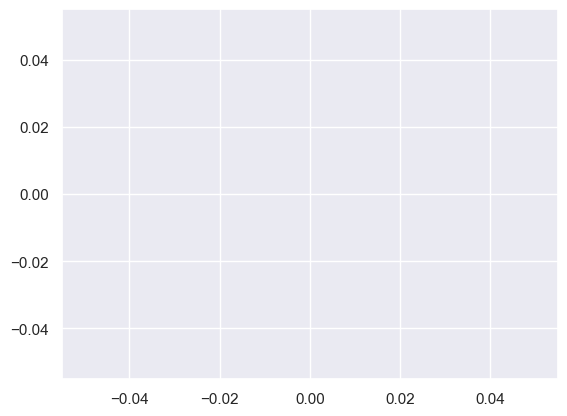

In [4]:
alpha = .5
space = 20

file_names = ["xray", "xray_rmsd", "rmsd"]

for i in range(4):
    for j in range(2):
        for plot_id in range(3):
            fig, axs = plt.subplots(2, 5, figsize=(25,8))

            for k in range(10):
                stat_df = stat_dfs_arr[i,j,plot_id,k]
                ax = axs[k//5][k%5]

                x = stat_df.index
                y = stat_df["{}_mean".format(y_fields_arr[i,j,plot_id])]
                std = stat_df["{}_std".format(y_fields_arr[i,j,plot_id])]

                ax.scatter(x[::space], y[::space], c="#424242ff", alpha=alpha)
                ax.errorbar(x[::space], y[::space], std[::space], linestyle='None', marker='o', capsize=3, c="#424242ff", alpha=alpha)

            fig_file = Path(Path.home(), "Desktop/volume_{}_{}_{}.png".format(file_names[plot_id],i,j))
            plt.savefig(fig_file)
            plt.close()

            plt.plot()

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(12,15))

fig_file = Path(Path.home(), "Desktop/volume.png".format(i,j))

space = 50
for i in range(3):
    for j in range(2):
        ax = axs[i][j]

        ax.tick_params(axis='x', labelsize=40)
        ax.tick_params(axis='y', labelsize=40)

        ax.xaxis.set_major_locator(ticker.MaxNLocator(3))
        ax.yaxis.set_major_locator(ticker.MaxNLocator(3))

        def two_decimal_places(x, pos):
            return f'{x:.2f}'
        ax.yaxis.set_major_formatter(FuncFormatter(two_decimal_places))


        stat_df = stat_dfs_arr[i,j,0,0]

        x = stat_df.index
        y = stat_df["{}_mean".format(y_fields_arr[i,j,0])]
        std = stat_df["{}_std".format(y_fields_arr[i,j,0])]

        ax.scatter(x[::space], y[::space], c="#424242ff", s=50, alpha=1)
        ax.errorbar(x[::space], y[::space], std[::space], linestyle='None', marker='o', elinewidth=3, capsize=10, c="#424242ff", alpha=1)

        # ax.set_aspect('equal', 'box')  # Ensure the aspect ratio is equal to make subplots square


plt.tight_layout()
plt.savefig(fig_file)
plt.close()
